In [60]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scout.utils import read_csv

In [61]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/'
os.listdir(working_dir)

['example_roi_Artifacts.pdf',
 'example_roi_Adjacent.pdf',
 'ventricle_size_vs_sox2_freq.pdf',
 'example_roi_Surface-DN.pdf',
 'cyto_zika_umap.pdf',
 'example_roi_DN.pdf',
 'cyto_profiles_combined.npy',
 'Zika',
 'average_profile_DN.pdf',
 'analysis.csv',
 'cyto_clusters_umap.pdf',
 'umap_zika_vs_mock.pdf',
 'average_profile_Artifacts.pdf',
 'volcano_plot_zika.pdf',
 'average_profile_Surface-DN.pdf',
 'model_zikv.umap',
 'cyto_profiles_combined_samples.npy',
 'clustermap_zika_hits.pdf',
 'example_roi_Surface-TBR1.pdf',
 'Zika_mock',
 'cyto_labels_combined.npy',
 'average_profile_Surface-TBR1.pdf',
 'zikv_with_FC.xlsx',
 'average_profile_Adjacent.pdf',
 'combined_features.xlsx']

In [62]:
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)

analysis['folder'] = analysis['type']

# Swap Zika 1 for Ctrl 1, and Zika 5 for Ctrl 5
z1_idx = ['zika1' in p for p in analysis.index].index(True)
z5_idx = ['zika5' in p for p in analysis.index].index(True)
c1_idx = ['ctrl1' in p for p in analysis.index].index(True)
c5_idx = ['ctrl5' in p for p in analysis.index].index(True)

analysis['type'].iloc[z1_idx] = 'Zika_mock'
analysis['type'].iloc[z5_idx] = 'Zika_mock'
analysis['type'].iloc[c1_idx] = 'Zika'
analysis['type'].iloc[c5_idx] = 'Zika'

analysis.head()

,type,folder
path,,
20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50,Zika_mock,Zika
20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50,Zika,Zika
20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50,Zika,Zika
20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50,Zika,Zika
20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50,Zika_mock,Zika


In [63]:
mock_profiles = np.concatenate([np.load(os.path.join(working_dir, f, p, 'dataset/cyto_profiles.npy')) for f, p in zip(analysis['folder'], analysis.index) if analysis['type'].loc[p] == 'Zika_mock'])
mock_labels = np.concatenate([np.load(os.path.join(working_dir, f, p, 'cyto_labels.npy')) for f, p in zip(analysis['folder'], analysis.index) if analysis['type'].loc[p] == 'Zika_mock'])
zika_profiles = np.concatenate([np.load(os.path.join(working_dir, f, p, 'dataset/cyto_profiles.npy')) for f, p in zip(analysis['folder'], analysis.index) if analysis['type'].loc[p] == 'Zika'])
zika_labels = np.concatenate([np.load(os.path.join(working_dir, f, p, 'cyto_labels.npy')) for f, p in zip(analysis['folder'], analysis.index) if analysis['type'].loc[p] == 'Zika'])

mock_profiles.shape, mock_labels.shape, zika_profiles.shape, zika_labels.shape

((731847, 3, 6), (731847,), (86906, 3, 6), (86906,))

In [64]:
cyto_names = read_csv(os.path.join(working_dir, analysis['folder'].iloc[0], analysis.index[0], 'cyto_names.csv'))
cyto_names

['Surface-TBR1', 'Surface-DN', 'DN', 'Artifacts', 'Adjacent']

In [65]:
celltype_names = read_csv(os.path.join(working_dir, analysis['folder'].iloc[0], analysis.index[0], 'dataset/celltype_names.csv'))
celltype_names

['sox2', 'tbr1', 'dn']

In [66]:
dists = []
counts = []
cytos = []
celltypes = []
for i, cyto in enumerate(cyto_names):
    idx = np.where(mock_labels == i)[0]
    profiles = mock_profiles[idx]
    # Explode the profiles
    for j, profile in enumerate(profiles):
        for k, p in enumerate(profile):
            for b, c in enumerate(p):
                dists.append(b)
                counts.append(c)
                cytos.append(cyto)
                celltypes.append(celltype_names[k])

In [67]:
df_mock = pd.DataFrame({'dist': dists, 'count': counts, 'cyto': cytos, 'celltype': celltypes})
df_mock.head()

,dist,count,cyto,celltype
0,0,44,Surface-TBR1,sox2
1,1,0,Surface-TBR1,sox2
2,2,0,Surface-TBR1,sox2
3,3,0,Surface-TBR1,sox2
4,4,0,Surface-TBR1,sox2


In [68]:
dists = []
counts = []
cytos = []
celltypes = []
for i, cyto in enumerate(cyto_names):
    idx = np.where(zika_labels == i)[0]
    profiles = zika_profiles[idx]
    # Explode the profiles
    for j, profile in enumerate(profiles):
        for k, p in enumerate(profile):
            for b, c in enumerate(p):
                dists.append(b)
                counts.append(c)
                cytos.append(cyto)
                celltypes.append(celltype_names[k])

In [69]:
df_zika = pd.DataFrame({'dist': dists, 'count': counts, 'cyto': cytos, 'celltype': celltypes})
df_zika.head()

,dist,count,cyto,celltype
0,0,70,Surface-TBR1,sox2
1,1,4,Surface-TBR1,sox2
2,2,0,Surface-TBR1,sox2
3,3,1,Surface-TBR1,sox2
4,4,0,Surface-TBR1,sox2


Surface-TBR1


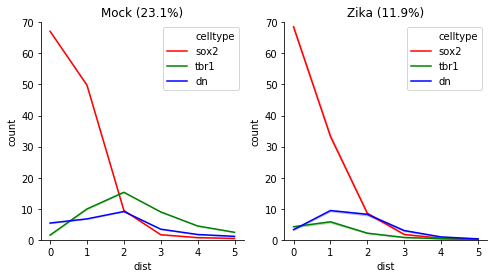

Surface-DN


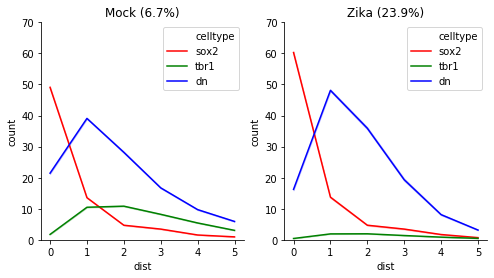

DN


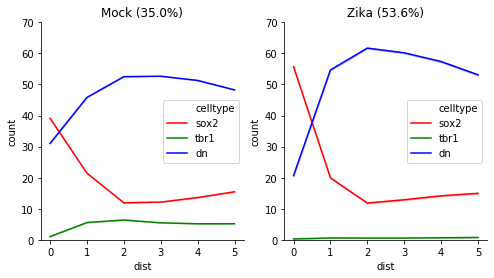

Artifacts


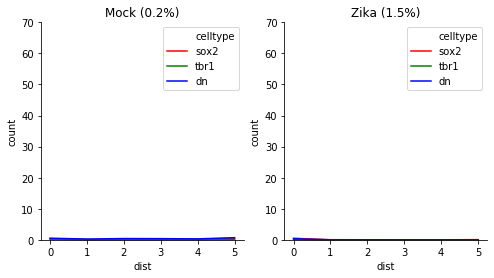

Adjacent


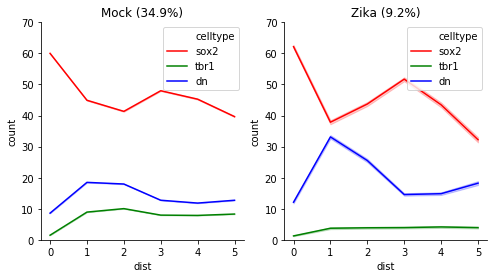

In [178]:
for c in cyto_names:
    print(c)
    df_mock_cyto = df_mock.where(df_mock['cyto'] == c).dropna()
    df_zika_cyto = df_zika.where(df_zika['cyto'] == c).dropna()
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.lineplot(x="dist", y="count", 
                 hue="celltype", ci=99, palette=['r', 'g', 'b'], 
                 data=df_mock_cyto)
    plt.ylim([0, 70])
    plt.title(f'Mock ({len(df_mock_cyto) / len(df_mock) * 100:0.1f}%)')
    sns.despine()
    plt.subplot(1, 2, 2)
    sns.lineplot(x="dist", y="count", 
                 hue="celltype", ci=99, palette=['r', 'g', 'b'], 
                 data=df_zika_cyto)
    plt.ylim([0, 70])
    plt.title(f'Zika ({len(df_zika_cyto) / len(df_zika) * 100:0.1f}%)')
    sns.despine()
    
    plt.savefig(os.path.join(working_dir, f'zika_vs_mock_average_profiles_{c}.pdf'), bbox_tight='inches')
    
    plt.show()

SOX2 Thickness

In [76]:
cyto_names

['Surface-TBR1', 'Surface-DN', 'DN', 'Artifacts', 'Adjacent']

In [132]:
mock_sox2_idx = np.where(np.logical_or(mock_labels == 0, mock_labels == 1))[0]
# mock_sox2_idx = np.where(mock_labels == 0)[0]
mock_profiles_sox2 = mock_profiles[mock_sox2_idx, 0]
mock_labels_sox2 = mock_labels[mock_sox2_idx]

zika_sox2_idx = np.where(np.logical_or(zika_labels == 0, zika_labels == 1))[0]
# zika_sox2_idx = np.where(zika_labels == 0)[0]
zika_profiles_sox2 = zika_profiles[zika_sox2_idx, 0]
zika_labels_sox2 = zika_labels[zika_sox2_idx]

mock_profiles_sox2.shape, zika_profiles_sox2.shape

((218229, 6), (31086, 6))

In [133]:
x = np.linspace(0, 300, 6) + 0
x

array([  0.,  60., 120., 180., 240., 300.])

In [134]:
mock_sox2_mean = (mock_profiles_sox2 * x).sum(axis=-1) / mock_profiles_sox2.sum(axis=-1)
mock_sox2_mean = mock_sox2_mean[~np.isnan(mock_sox2_mean)]
mock_sox2_mean.shape, np.isnan(mock_sox2_mean).max()

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


((217003,), False)

In [135]:
zika_sox2_mean = (zika_profiles_sox2 * x).sum(axis=-1) / zika_profiles_sox2.sum(axis=-1)
zika_sox2_mean = zika_sox2_mean[~np.isnan(zika_sox2_mean)]
zika_sox2_mean.shape, np.isnan(zika_sox2_mean).max()

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


((31013,), False)

In [138]:
df_sox2 = pd.DataFrame({'dist': np.concatenate([mock_sox2_mean, zika_sox2_mean]),
                        'type': len(mock_sox2_mean) * ['Mock'] + len(zika_sox2_mean) * ['Zika']})

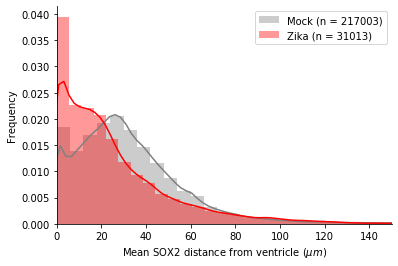

In [136]:
# Surface-TBR1 vs Surface-DN
plt.figure()
sns.distplot(mock_sox2_mean, color='gray', label=f'Mock (n = {len(mock_sox2_mean)})')
sns.distplot(zika_sox2_mean, color='red', label=f'Zika (n = {len(zika_sox2_mean)})')
sns.despine()
plt.xlabel('Mean SOX2 distance from ventricle ($\mu m$)')
plt.ylabel('Frequency')
plt.legend()
plt.xlim([0, 150])
plt.show()

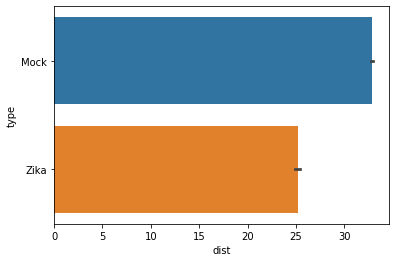

In [140]:
sns.barplot(x='dist', y='type', data=df_sox2)
plt.show()

In [175]:
%matplotlib inline

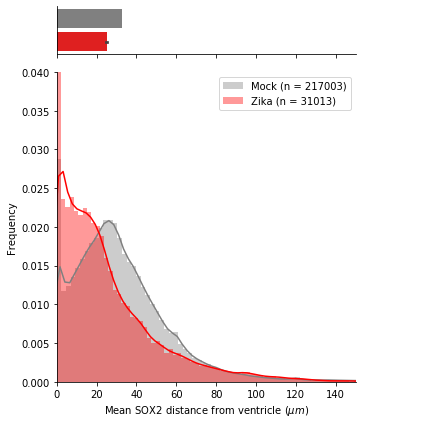

In [176]:
g = sns.JointGrid(1, 2)

g.ax_marg_y.axis('off')

sns.barplot(x='dist', y='type', data=df_sox2, ax=g.ax_marg_x, palette=['gray', 'r'])
sns.distplot(mock_sox2_mean, bins=128, color='gray', label=f'Mock (n = {len(mock_sox2_mean)})', ax=g.ax_joint)
sns.distplot(zika_sox2_mean, bins=128, color='red', label=f'Zika (n = {len(zika_sox2_mean)})', ax=g.ax_joint)
sns.despine()

g.ax_marg_x.set_xlabel('')
g.ax_marg_x.set_ylabel('')
g.ax_joint.set_xlabel('Mean SOX2 distance from ventricle ($\mu m$)')
g.ax_joint.set_ylabel('Frequency')
g.ax_joint.legend()
g.ax_joint.set_xlim([0, 150])
g.ax_joint.set_ylim([0, 0.04])
plt.tight_layout()

plt.savefig(os.path.join(working_dir, 'mean_SOX2_ventricle_distance.pdf'), bbox_tight='inches')

plt.show()

In [191]:
a = df_sox2.where(df_sox2['type'] == 'Mock').dropna()
b = df_sox2.where(df_sox2['type'] == 'Zika').dropna()

a_mean = a.mean().values
a_mean

array([32.81647558])

In [192]:
b_mean = b.mean().values
b_mean

array([25.17356129])

In [193]:
a_stdev = a.std().values
a_stdev

array([26.9393137])

In [194]:
b_stdev = b.std().values
b_stdev

array([25.63305869])

In [189]:
from scipy.stats import ttest_ind_from_stats

In [196]:
t, p = ttest_ind_from_stats(a_mean[0], a_stdev[0], len(a), b_mean[0], b_stdev[0], len(b))
t, p

(47.013439467083415, 0.0)

0.0